## HOMEWORK1
### Carvana

In [10]:
#import packages
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).
from pandas.plotting import scatter_matrix, parallel_coordinates

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import seaborn as sns # Making statistical graphs on top of what matplot can do 

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline

In [11]:
#create the dataframe
training_df = pd.read_csv('training_car.csv')

In [52]:
#show the shape of the dataframe
training_df.shape

(72983, 34)

In [53]:
#show column names
training_df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [54]:
#show the top rows of the dataframe
training_df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [55]:
#describe the dataframe
np.round(training_df.describe(), decimals=2)

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.00,72983.00,72983.00,72983.00,69814.00,72983.00,72965.00,72965.00,72965.00,72965.00,72668.00,72668.00,72668.00,72668.00,72983.00,72983.00,72983.00,72983.00,72983.00
mean,36511.43,0.12,2005.34,4.18,1.49,71500.00,6128.91,7373.64,8497.03,9850.93,6132.08,7390.68,8775.72,10145.39,26345.84,58043.06,6730.93,0.03,1276.58
std,21077.24,0.33,1.73,1.71,0.52,14578.91,2461.99,2722.49,3156.29,3385.79,2434.57,2686.25,3090.70,3310.25,25717.35,26151.64,1767.85,0.16,598.85
min,1.00,0.00,2001.00,0.00,0.00,4825.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,835.00,2764.00,1.00,0.00,462.00
25%,18257.50,0.00,2004.00,3.00,1.00,61837.00,4273.00,5406.00,6280.00,7493.00,4275.00,5414.00,6536.00,7784.00,17212.00,32124.00,5435.00,0.00,837.00
50%,36514.00,0.00,2005.00,4.00,1.00,73361.00,6097.00,7303.00,8444.00,9789.00,6062.00,7313.00,8729.00,10103.00,19662.00,73108.00,6700.00,0.00,1155.00
75%,54764.50,0.00,2007.00,5.00,2.00,82436.00,7765.00,9021.00,10651.00,12088.00,7736.00,9013.00,10911.00,12309.00,22808.00,80022.00,7900.00,0.00,1623.00
max,73014.00,1.00,2010.00,9.00,3.00,115717.00,35722.00,36859.00,39080.00,41482.00,35722.00,36859.00,39080.00,41062.00,99761.00,99224.00,45469.00,1.00,7498.00


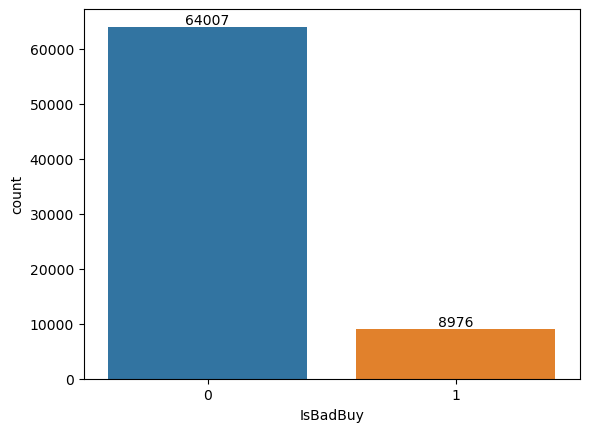

In [8]:
#show the count of "bad buys" and "good buys"
a = sns.countplot(x=training_df["IsBadBuy"])
for label in a.containers:
    a.bar_label(label)

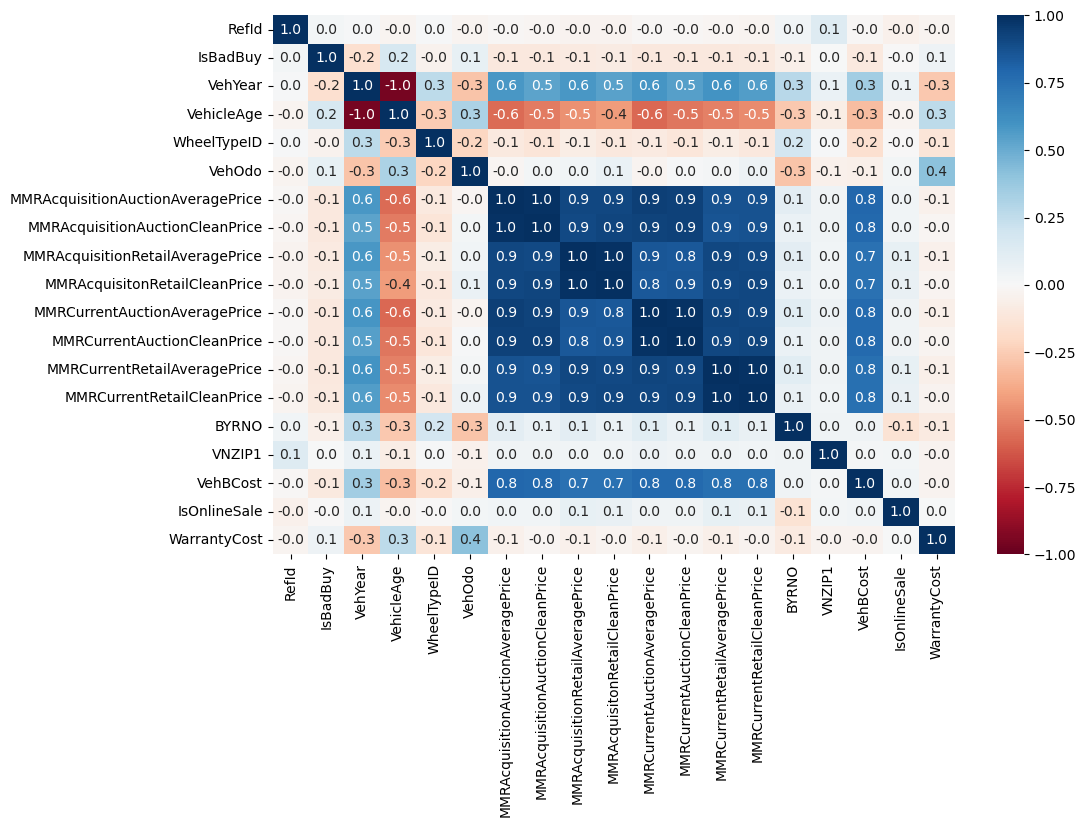

In [56]:
#show the heatmap for the dataframe
corr = training_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax, vmin=-1, vmax=1,)

plt.show()

In [3]:
#narrow down columns based on correlation
columns_new = ['IsBadBuy', 'VehYear', 'VehicleAge','VehOdo','MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice','WarrantyCost']
training_columns = training_df[columns_new]

In [4]:
#describe the new columns
np.round(training_columns.describe(), decimals=2)

,IsBadBuy,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,WarrantyCost
count,72983.00,72983.00,72983.00,72983.00,72965.00,72965.00,72965.00,72965.00,72668.00,72668.00,72668.00,72668.00,72983.00
mean,0.12,2005.34,4.18,71500.00,6128.91,7373.64,8497.03,9850.93,6132.08,7390.68,8775.72,10145.39,1276.58
std,0.33,1.73,1.71,14578.91,2461.99,2722.49,3156.29,3385.79,2434.57,2686.25,3090.70,3310.25,598.85
min,0.00,2001.00,0.00,4825.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,462.00
25%,0.00,2004.00,3.00,61837.00,4273.00,5406.00,6280.00,7493.00,4275.00,5414.00,6536.00,7784.00,837.00
50%,0.00,2005.00,4.00,73361.00,6097.00,7303.00,8444.00,9789.00,6062.00,7313.00,8729.00,10103.00,1155.00
75%,0.00,2007.00,5.00,82436.00,7765.00,9021.00,10651.00,12088.00,7736.00,9013.00,10911.00,12309.00,1623.00
max,1.00,2010.00,9.00,115717.00,35722.00,36859.00,39080.00,41482.00,35722.00,36859.00,39080.00,41062.00,7498.00


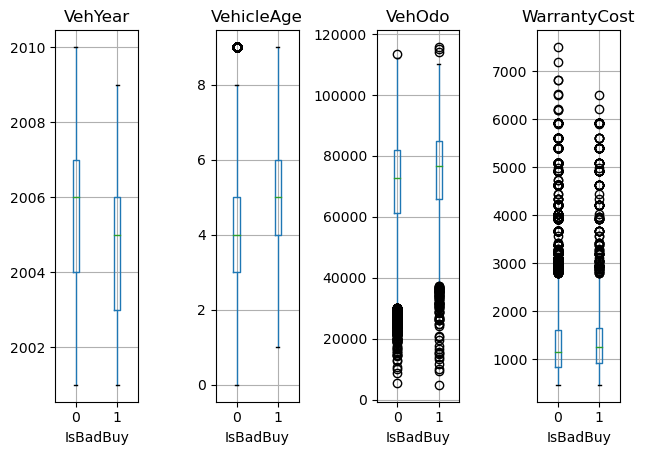

In [5]:
#box plot of indicators that lead to a bad buy
fig, axes = plt.subplots(nrows=1, ncols=4) #provide multiple plots
training_df.boxplot(column='VehYear', by='IsBadBuy', ax=axes[0])
training_df.boxplot(column='VehicleAge', by='IsBadBuy', ax=axes[1])
training_df.boxplot(column='VehOdo', by='IsBadBuy', ax=axes[2])
training_df.boxplot(column='WarrantyCost', by='IsBadBuy', ax=axes[3])
for ax in axes:
    ax.set_xlabel('IsBadBuy')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

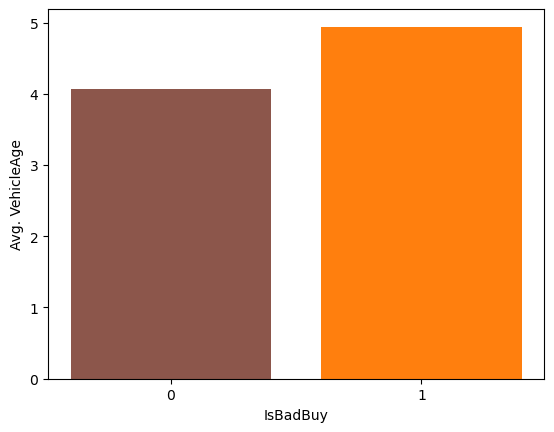

In [23]:
#bar chart of average vehicle age that is a bad buy and not a bad buy
dataForPlot = training_df.groupby('IsBadBuy').mean().VehicleAge
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1])
ax.set_xlabel('IsBadBuy')
ax.set_ylabel('Avg. VehicleAge')
plt.show()

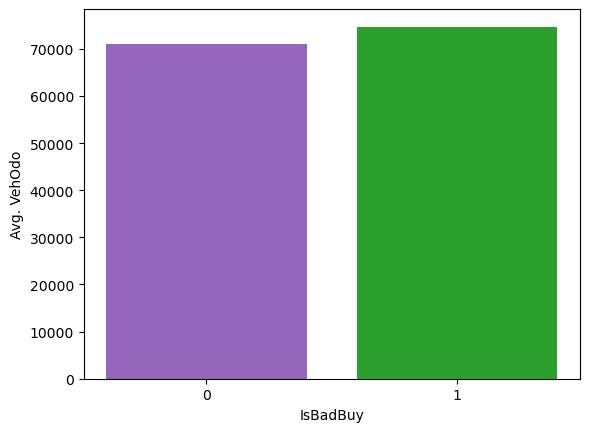

In [27]:
#bar chart of average vehicle odometer that is a bad buy and not a bad buy
dataForPlot = training_df.groupby('IsBadBuy').mean().VehOdo
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C4', 'C2'])
ax.set_xticks([0, 1])
ax.set_xlabel('IsBadBuy')
ax.set_ylabel('Avg. VehOdo')
plt.show()

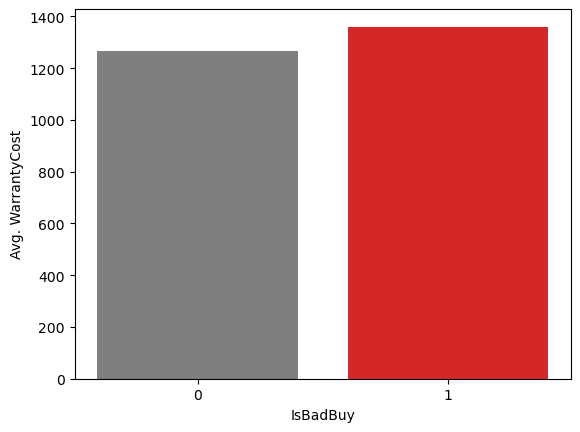

In [28]:
#bar chart of average warranty cost that is a bad buy and not a bad buy
dataForPlot = training_df.groupby('IsBadBuy').mean().WarrantyCost
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C7', 'C3'])
ax.set_xticks([0, 1])
ax.set_xlabel('IsBadBuy')
ax.set_ylabel('Avg. WarrantyCost')
plt.show()

With the data given, we found out that the leading indicators for a bad buy are Vehicle Age, Vehicle Odometer and Warranty Cost.

We give the following recommendations to Carvana in order to avoid bad buys in the second hand auto market:

1.Look at the age of the vehicle. If the age is more than 4 years, most likely the vehicle is no good.

2.Check the odometer of the vehicle. Make sure that the max odometer of the vehicle is no bigger than 70,000 kph.

3.Check the warranty cost of the vehicle. Warranty cost below 1200 has a good chance of the vehicle not being a bad buy.

4.Check the year the vehicle was manufactured since some vehicles manufactured at a certain year bear some defects.

### Airfares

In [12]:
#create the dataframe
airfare_df = pd.read_csv('Airfares.csv')

In [13]:
#show the shape of the dataframe
airfare_df.shape

(638, 18)

In [5]:
#show column names
airfare_df.columns

Index(['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'COUPON', 'NEW', 'VACATION',
       'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE',
       'DISTANCE', 'PAX', 'FARE'],
      dtype='object')

In [6]:
#show the top rows of the dataframe
airfare_df.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


In [7]:
#describe the dataframe
np.round(airfare_df.describe(), decimals=2)

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00
mean,1.20,2.75,4442.14,27759.86,27663.73,4557004.49,3194503.10,975.65,12782.21,160.88
std,0.20,0.76,1724.27,3596.21,4611.33,3010985.26,2735603.92,646.24,13202.23,76.02
min,1.00,0.00,1230.48,14600.00,14600.00,29838.00,111745.00,114.00,1504.00,42.47
25%,1.04,3.00,3090.14,24706.00,23903.00,1862106.00,1228816.00,455.00,5328.50,106.29
50%,1.15,3.00,4208.18,28637.00,26409.00,3532657.00,2195215.00,850.00,7792.00,144.60
75%,1.30,3.00,5480.58,29693.50,31981.00,7830332.00,4549784.00,1306.25,14090.50,209.35
max,1.94,3.00,10000.00,38813.00,38813.00,9056076.00,9056076.00,2764.00,73892.00,402.02


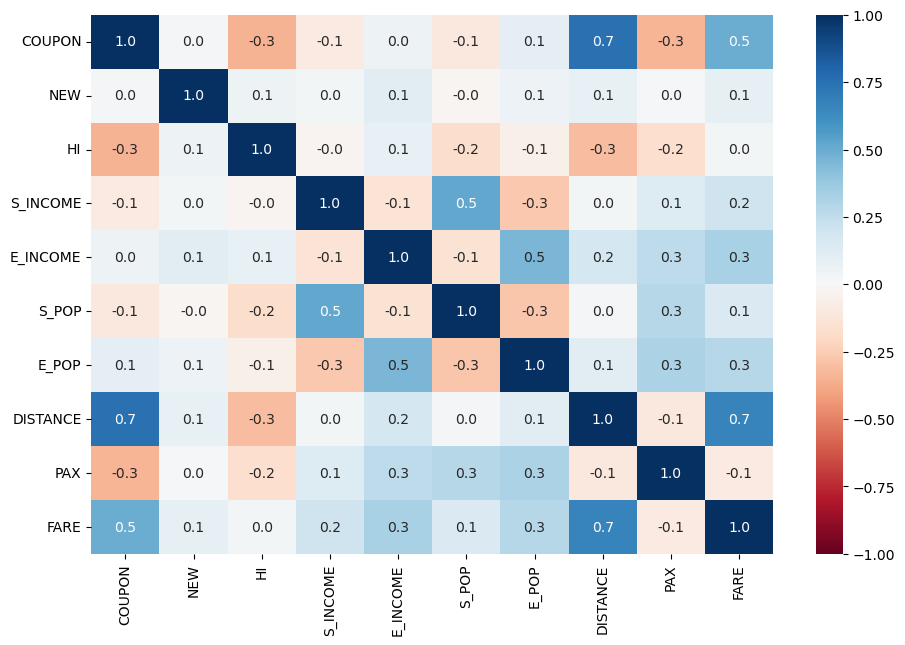

In [9]:
#show the heatmap for the dataframe
corr = airfare_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax, vmin=-1, vmax=1,)

plt.show()

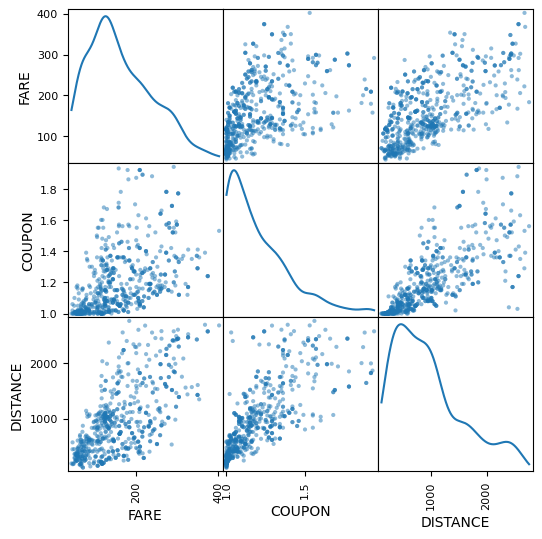

In [13]:
#scatter matrix for the indicators that have a strong relationship with FARE
_ = scatter_matrix(airfare_df[['FARE', 'COUPON', 'DISTANCE' ]], figsize=(6, 6), diagonal='kde')

Given the heatmap, we can say that FARE is correlated to the following numerical indicators:
Coupon, New, HI, S_Income, E_Income, S_Pop, E_Pop, Distance, and PAX. All have a positive relationship with FARE except for PAX.
There are two indicators that have a strong positive relationship with FARE. These two are the Coupon and Distance indicators.
This is further supported by the scatter matrix above.

In [3]:
#check variable types of the columns
airfare_df.dtypes

S_CODE       object
S_CITY       object
E_CODE       object
E_CITY       object
COUPON      float64
NEW           int64
VACATION     object
SW           object
HI          float64
S_INCOME    float64
E_INCOME    float64
S_POP         int64
E_POP         int64
SLOT         object
GATE         object
DISTANCE      int64
PAX           int64
FARE        float64
dtype: object

In [14]:
#change the types of the 4 categorical columns to 'category'
airfare_df.VACATION = airfare_df.VACATION.astype('category')
airfare_df.SW = airfare_df.SW.astype('category')
airfare_df.SLOT = airfare_df.SLOT.astype('category')
airfare_df.GATE = airfare_df.GATE.astype('category')
print(airfare_df.VACATION.cat.categories)
print(airfare_df.SW.cat.categories) 
print(airfare_df.SLOT.cat.categories) 
print(airfare_df.GATE.cat.categories) 

Index(['No', 'Yes'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['Controlled', 'Free'], dtype='object')
Index(['Constrained', 'Free'], dtype='object')


In [15]:
#create dummies for categorical data
airfare_df = pd.get_dummies(airfare_df, prefix=['VACATION', 'SW', 'SLOT', 'GATE'], columns=['VACATION', 'SW', 'SLOT', 'GATE'], drop_first=True)
airfare_df.columns

Index(['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'COUPON', 'NEW', 'HI',
       'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX', 'FARE',
       'VACATION_Yes', 'SW_Yes', 'SLOT_Free', 'GATE_Free'],
      dtype='object')

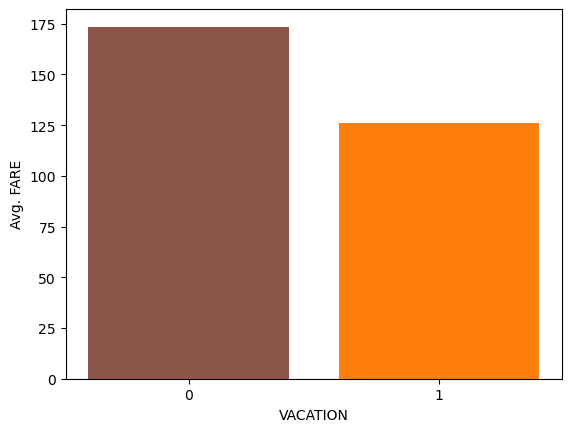

In [5]:
dataForPlot = airfare_df.groupby('VACATION_Yes').mean().FARE
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1])
ax.set_xlabel('VACATION')
ax.set_ylabel('Avg. FARE')
plt.show()

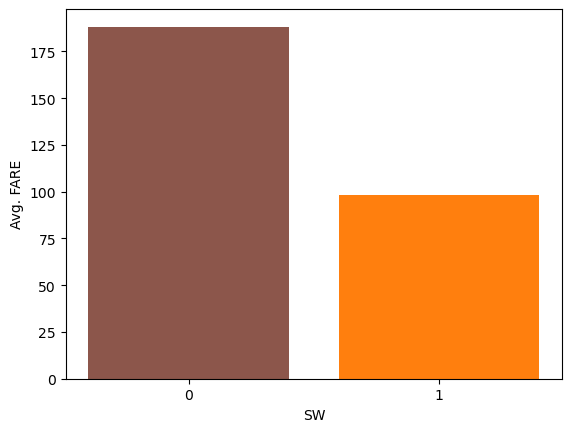

In [6]:
dataForPlot = airfare_df.groupby('SW_Yes').mean().FARE
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1])
ax.set_xlabel('SW')
ax.set_ylabel('Avg. FARE')
plt.show()

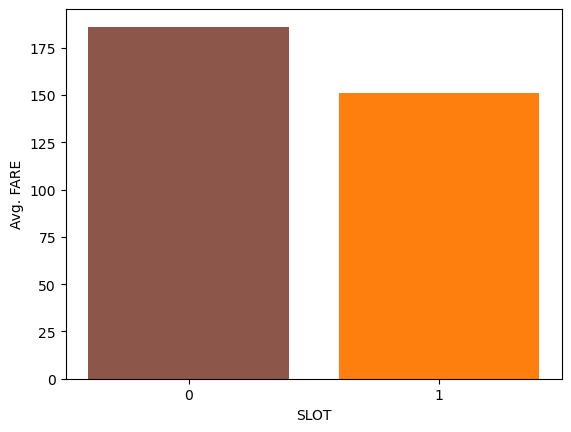

In [7]:
dataForPlot = airfare_df.groupby('SLOT_Free').mean().FARE
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1])
ax.set_xlabel('SLOT')
ax.set_ylabel('Avg. FARE')
plt.show()

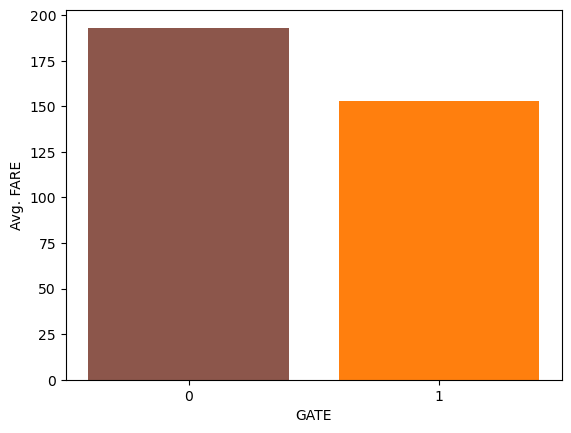

In [9]:
dataForPlot = airfare_df.groupby('GATE_Free').mean().FARE
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1])
ax.set_xlabel('GATE')
ax.set_ylabel('Avg. FARE')
plt.show()

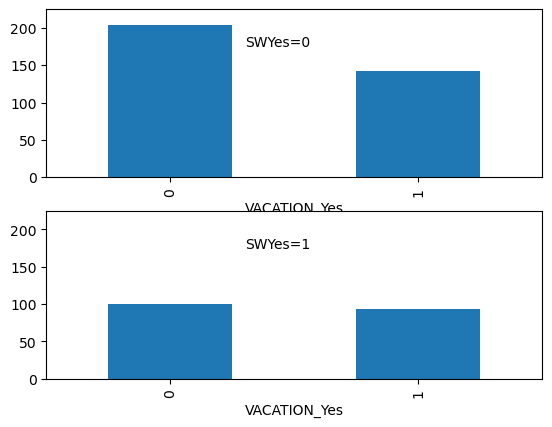

In [46]:
dataForPlot_df = airfare_df.groupby(['SW_Yes','VACATION_Yes']).mean()['FARE']
# We determine all possible Vacation values to use as ticks
ticks = set(airfare_df.VACATION_Yes)
#If a particular Vacation value is missing for an SW, make the mean = 0
for i in range(2):
    for t in ticks.difference(dataForPlot_df[i].index):
        dataForPlot_df.loc[(i, t)] = 0
# reorder so that the index is sorted
dataForPlot_df = dataForPlot_df[sorted(dataForPlot_df.index)]

# Determine a common range for the y axis
yRange = [0, max(dataForPlot_df) * 1.1] 

fig, axes = plt.subplots(nrows=2, ncols=1)
dataForPlot_df[0].plot.bar(x='VACATION', ax=axes[0], ylim=yRange)
dataForPlot_df[1].plot.bar(x='VACATION', ax=axes[1], ylim=yRange)
axes[0].annotate('SWYes=0', xy=(0.3, 175))
axes[1].annotate('SWYes=1', xy=(0.3, 175))

plt.show()

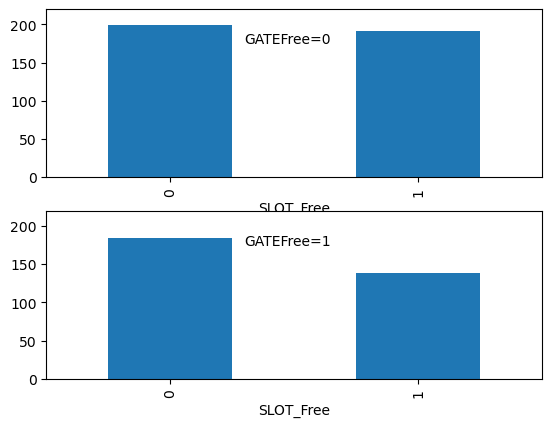

In [41]:
dataForPlot_df = airfare_df.groupby(['GATE_Free','SLOT_Free']).mean()['FARE']
# We determine all possible Vacation values to use as ticks
ticks = set(airfare_df.VACATION_Yes)
#If a particular Vacation value is missing for an SW, make the mean = 0
for i in range(2):
    for t in ticks.difference(dataForPlot_df[i].index):
        dataForPlot_df.loc[(i, t)] = 0
# reorder so that the index is sorted
dataForPlot_df = dataForPlot_df[sorted(dataForPlot_df.index)]

# Determine a common range for the y axis
yRange = [0, max(dataForPlot_df) * 1.1] 

fig, axes = plt.subplots(nrows=2, ncols=1)
dataForPlot_df[0].plot.bar(x='SLOT', ax=axes[0], ylim=yRange)
dataForPlot_df[1].plot.bar(x='SLOT', ax=axes[1], ylim=yRange)
axes[0].annotate('GATEFree=0', xy=(0.3, 175))
axes[1].annotate('GATEFree=1', xy=(0.3, 175))

plt.show()

When checking the effects of the categorical indicators to FARE. The following are observed:

1.) There's a higher fare average when it comes to non-vacation routes (average of $173)

2.) If the route is served by Southwest, the fare average is lower than that of routes that are not served by Southwest (average of $98)

3.) The fare average is lower when the endpoint airport is not slot-controlled (average of $150)

4.) Fare average is higher when the endpoint airport has gate constraints (average of $193)

5.) When comparing the routes and airlines vis-a-vis average spend, we can say that there is a higher fare average if the airline used is not from southwest and not a vacation route.

6.) There's a higher fare average when the airport has slot control and gate constraints.

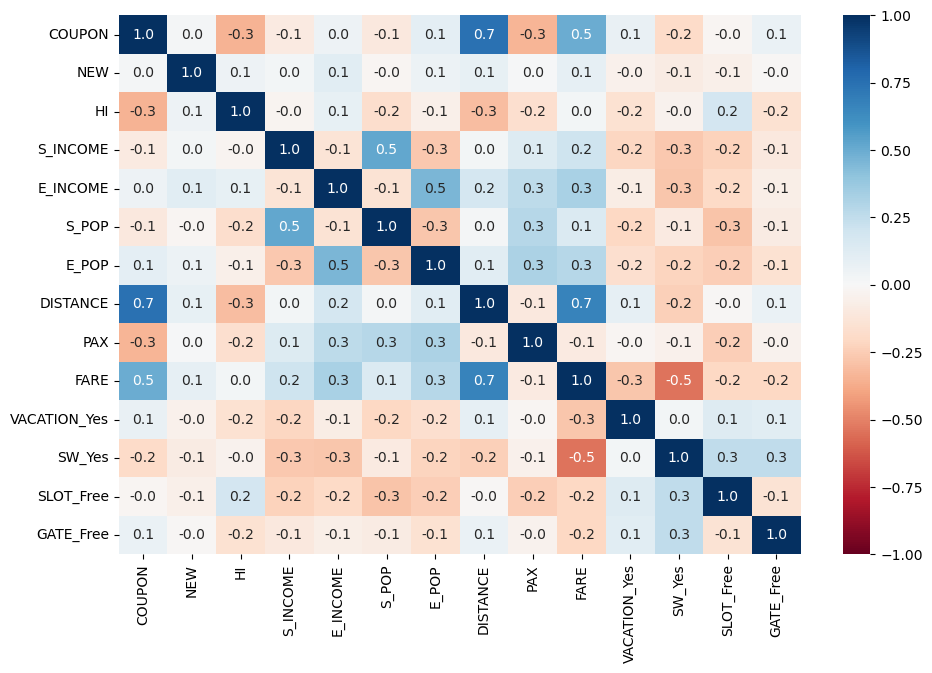

In [19]:
#show the heatmap for the dataframe with the categorical data
corr = airfare_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax, vmin=-1, vmax=1,)

plt.show()

In [80]:
#partitioning the data set
trainData, validData = train_test_split(airfare_df, test_size=0.20, random_state=1) #random_state - fixes a particular sequence to use the same training data
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)

Training   :  (510, 18)
Validation :  (128, 18)


In [94]:
#Creating model for all predictors
predictors = ['COUPON', 'NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX', 'VACATION_Yes', 'SW_Yes', 'SLOT_Free', 'GATE_Free']
outcome = 'FARE'

# partition data
X = pd.get_dummies(airfare_df[predictors], drop_first=True)
y = airfare_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

airfare_lm = LinearRegression()
airfare_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', airfare_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': airfare_lm.coef_}))

# print performance measures
regressionSummary(train_y, airfare_lm.predict(train_X))

intercept  20.7699772910872
       Predictor  coefficient
0         COUPON     1.025389
1            NEW    -3.277984
2             HI     0.008338
3       S_INCOME     0.000932
4       E_INCOME     0.001500
5          S_POP     0.000004
6          E_POP     0.000004
7       DISTANCE     0.076356
8            PAX    -0.000850
9   VACATION_Yes   -35.383010
10        SW_Yes   -39.384510
11     SLOT_Free   -17.160040
12     GATE_Free   -21.483195

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 34.7892
            Mean Absolute Error (MAE) : 27.1379
          Mean Percentage Error (MPE) : -4.3900
Mean Absolute Percentage Error (MAPE) : 20.4409


In [95]:
# Testing the training data
airfare_lm_pred = airfare_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': airfare_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - airfare_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, airfare_lm_pred)

      Predicted  Actual   Residual
101  185.097049  240.88  55.782951
619  310.306952  347.82  37.513048
616  254.766721  279.83  25.063279
446  146.669405  128.36 -18.309405
522  301.443944  289.25 -12.193944
525  229.607424  238.73   9.122576
305  112.356219  140.90  28.543781
41   206.599598  250.73  44.130402
47   180.141031  230.87  50.728969
605  158.395358  164.30   5.904642
455   62.609505  118.17  55.560495
523  312.323066  289.25 -23.073066
339  104.453111  105.41   0.956889
69   142.131277  113.99 -28.141277
473  277.325607  248.49 -28.835607
460  189.711670  252.97  63.258330
635  167.453939  124.87 -42.583939
23   105.332391  106.77   1.437609
554   48.137114  106.65  58.512886
13   143.242581  132.05 -11.192581

Regression statistics

                      Mean Error (ME) : 3.8018
       Root Mean Squared Error (RMSE) : 36.4332
            Mean Absolute Error (MAE) : 29.0714
          Mean Percentage Error (MPE) : -2.8133
Mean Absolute Percentage Error (MAPE) : 20.8754


In [96]:
#We will first define a couple of functions to be used in Exhaustive Search function
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
    
# Define the width of output presentation to be wider to display results in two rows (instead of more rows otherwise). 
pd.set_option('display.width', 100)

# Display the Exhaustive Search results.
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
#print(pd.DataFrame(data)) #Good enough too. Variables appear in the same order in dataset 

# Reset the output width to the default. 
pd.reset_option('display.width')

     n     r2adj          AIC  COUPON  DISTANCE  E_INCOME  E_POP  GATE_Free     HI    NEW    PAX  \
0    1  0.443781  5565.398249   False      True     False  False      False  False  False  False   
1    2  0.595067  5404.498607   False      True     False  False      False  False  False  False   
2    3  0.705251  5243.517268   False      True     False  False      False  False  False  False   
3    4  0.729122  5201.436570   False      True     False  False      False   True  False  False   
4    5  0.741689  5178.197668   False      True     False  False      False   True  False  False   
5    6  0.760435  5140.761863   False      True     False  False       True   True  False  False   
6    7  0.763313  5135.582654   False      True      True  False       True   True  False  False   
7    8  0.768434  5125.410705   False      True      True   True      False   True  False   True   
8    9  0.777413  5106.222802   False      True     False   True       True   True  False   True   


The model with the highest accuracy will have the following predictors: Distance, E_Income, E_Pop, Gate, HI, NEW, PAX, Slot, SW, S_Income, S_Pop, and Vacation. 

In [98]:
#Creating a model based on the exhaustive search method
predictors = ['HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX', 'VACATION_Yes', 'SW_Yes', 'SLOT_Free', 'GATE_Free', 'NEW']
outcome = 'FARE'

# partition data
X = pd.get_dummies(airfare_df[predictors], drop_first=True)
y = airfare_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

airfare_lm = LinearRegression()
airfare_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', airfare_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': airfare_lm.coef_}))

# print performance measures
regressionSummary(train_y, airfare_lm.predict(train_X))

intercept  22.238545703206
       Predictor  coefficient
0             HI     0.008314
1       S_INCOME     0.000928
2       E_INCOME     0.001498
3          S_POP     0.000004
4          E_POP     0.000004
5       DISTANCE     0.076570
6            PAX    -0.000855
7   VACATION_Yes   -35.414419
8         SW_Yes   -39.412572
9      SLOT_Free   -17.189341
10     GATE_Free   -21.499469
11           NEW    -3.288690

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 34.7895
            Mean Absolute Error (MAE) : 27.1387
          Mean Percentage Error (MPE) : -4.3908
Mean Absolute Percentage Error (MAPE) : 20.4430


In [99]:
# Testing the training data
airfare_lm_pred = airfare_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': airfare_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - airfare_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, airfare_lm_pred)

      Predicted  Actual   Residual
101  185.165261  240.88  55.714739
619  310.322998  347.82  37.497002
616  254.735715  279.83  25.094285
446  146.657091  128.36 -18.297091
522  301.477561  289.25 -12.227561
525  229.350179  238.73   9.379821
305  112.225044  140.90  28.674956
41   206.485407  250.73  44.244593
47   180.144860  230.87  50.725140
605  158.231135  164.30   6.068865
455   62.310075  118.17  55.859925
523  312.365068  289.25 -23.115068
339  104.598073  105.41   0.811927
69   142.189830  113.99 -28.199830
473  277.377742  248.49 -28.887742
460  189.799886  252.97  63.170114
635  167.397916  124.87 -42.527916
23   105.370817  106.77   1.399183
554   47.816287  106.65  58.833713
13   143.227436  132.05 -11.177436

Regression statistics

                      Mean Error (ME) : 3.7968
       Root Mean Squared Error (RMSE) : 36.4383
            Mean Absolute Error (MAE) : 29.0792
          Mean Percentage Error (MPE) : -2.8153
Mean Absolute Percentage Error (MAPE) : 20.8864


In [100]:
#Backward Elimination Method
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

bestBE_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_Yes, SW_Yes, SLOT_Free, GATE_Free, NEW
Start: score=5095.62
Step: score=5095.62, remove None
['HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX', 'VACATION_Yes', 'SW_Yes', 'SLOT_Free', 'GATE_Free', 'NEW']


In [101]:
regressionSummary(valid_y, bestBE_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 3.7968
       Root Mean Squared Error (RMSE) : 36.4383
            Mean Absolute Error (MAE) : 29.0792
          Mean Percentage Error (MPE) : -2.8153
Mean Absolute Percentage Error (MAPE) : 20.8864


In [102]:
#Forward Selection Method
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

bestFS_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_Yes, SW_Yes, SLOT_Free, GATE_Free, NEW
Start: score=5863.56, constant
Step: score=5565.40, add DISTANCE
Step: score=5404.50, add SW_Yes
Step: score=5243.52, add VACATION_Yes
Step: score=5201.44, add HI
Step: score=5178.20, add SLOT_Free
Step: score=5140.76, add GATE_Free
Step: score=5135.58, add E_INCOME
Step: score=5127.96, add PAX
Step: score=5116.86, add S_POP
Step: score=5096.68, add E_POP
Step: score=5095.99, add S_INCOME
Step: score=5095.62, add NEW
Step: score=5095.62, add None
['DISTANCE', 'SW_Yes', 'VACATION_Yes', 'HI', 'SLOT_Free', 'GATE_Free', 'E_INCOME', 'PAX', 'S_POP', 'E_POP', 'S_INCOME', 'NEW']


In [103]:
regressionSummary(valid_y, bestFS_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 3.7968
       Root Mean Squared Error (RMSE) : 36.4383
            Mean Absolute Error (MAE) : 29.0792
          Mean Percentage Error (MPE) : -2.8153
Mean Absolute Percentage Error (MAPE) : 20.8864


In [104]:
#Stepwise Method
bestSW_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_Yes, SW_Yes, SLOT_Free, GATE_Free, NEW
Start: score=5863.56, constant
Step: score=5565.40, add DISTANCE
Step: score=5404.50, add SW_Yes
Step: score=5243.52, add VACATION_Yes
Step: score=5201.44, add HI
Step: score=5178.20, add SLOT_Free
Step: score=5140.76, add GATE_Free
Step: score=5135.58, add E_INCOME
Step: score=5127.96, add PAX
Step: score=5116.86, add S_POP
Step: score=5096.68, add E_POP
Step: score=5095.99, add S_INCOME
Step: score=5095.62, add NEW
Step: score=5095.62, unchanged None
['DISTANCE', 'SW_Yes', 'VACATION_Yes', 'HI', 'SLOT_Free', 'GATE_Free', 'E_INCOME', 'PAX', 'S_POP', 'E_POP', 'S_INCOME', 'NEW']


In [105]:
regressionSummary(valid_y, bestSW_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 3.7968
       Root Mean Squared Error (RMSE) : 36.4383
            Mean Absolute Error (MAE) : 29.0792
          Mean Percentage Error (MPE) : -2.8153
Mean Absolute Percentage Error (MAPE) : 20.8864


All methods have produced the highest AIC score of 5095.62 and they have suggested the following predictors for the final model:['DISTANCE', 'SW_Yes', 'VACATION_Yes', 'HI', 'SLOT_Free', 'GATE_Free', 'E_INCOME', 'PAX', 'S_POP', 'E_POP', 'S_INCOME', 'NEW']  

Based on the analysis of the validation data, it can be concluded that the model's predictions for airfares are not very precise, with an RMSE value of 36.4383 indicating an average error of approximately $36.44. The ME value of 3.7968 suggests that the model's predictions have a small positive bias, indicating a tendency to slightly overestimate airfares. Additionally, the MAPE value of 20.8864% indicates that the model's predictions are off by approximately 20.89% of the actual airfare, on average. Despite these limitations, the overall accuracy measures suggest that the model is still able to predict airfares with reasonable accuracy on new data.

The model that we developed seems to perform reasonably well, with relatively low RMSE and MAPE values. Thus, based on the accuracy measures and error metrics,  our model would be useful for predicting airfares. However, until we validate the model's performance on new test data we cannot make any important business decisions based on the model's predictions. Nonetheless, the fact that the model has similar performance on the training and validation datasets suggests that it may be able to generalize well to new data.